# MODEL 1: LSTM

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings 
warnings.filterwarnings("ignore")

In [9]:
df=pd.read_csv("ADANIPORTS.csv")

In [10]:
df.shape

(3322, 15)

In [11]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [12]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942
3321,2021-04-30,ADANIPORTS,EQ,746.75,739.0,759.45,724.50,726.4,730.05,743.35,12600934,9.366911e+14,132141.0,3514692,0.2789


In [13]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [14]:
df.drop("Trades",axis=1,inplace=True)

In [15]:
df1=df.reset_index()["High"]
df1.shape

(3322,)

In [16]:
df1

0       1050.00
1        990.00
2        914.75
3        958.00
4        995.00
         ...   
3317     739.65
3318     757.50
3319     760.00
3320     765.85
3321     759.45
Name: High, Length: 3322, dtype: float64

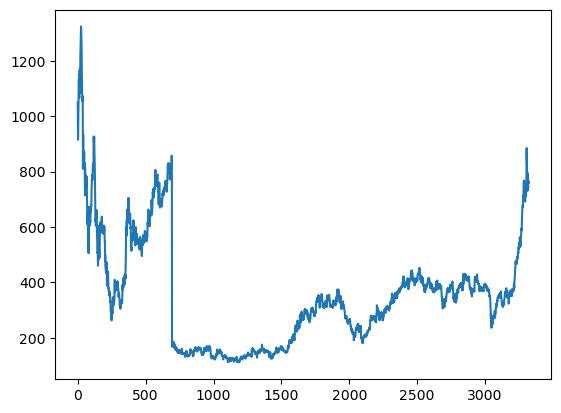

In [17]:
plt.plot(df1)

# #Scaling the data

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
df1

array([[0.77421614],
       [0.72477442],
       [0.66276626],
       ...,
       [0.53524783],
       [0.54006839],
       [0.53479461]])

# #Splitting dataset into train_data, test_data

In [14]:
train_size=int(len(df1)*0.85)
test_size=len(df1)-train_size
train_data, test_data= df1[0:train_size,:], df1[train_size:len(df1),:]

In [15]:
train_size,test_size, len(train_data), len(test_data)

(2823, 499, 2823, 499)

# Converting an array of values into a dataset matrix

In [16]:

def create_dataset(dataset, time_step=1):
    datax, datay = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]      ###i=0, 0,1,2,3-----99   100 
        datax.append(a)
        datay.append(dataset[i + time_step, 0])
    return np.array(datax), np.array(datay)

## Reshaping into x=t, t+1, t+2, t+3 and y=t+4

In [17]:
time_step= 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test= create_dataset(test_data, time_step)

In [18]:
print(x_train)

[[0.77421614 0.72477442 0.66276626 ... 0.44868361 0.46388694 0.46759507]
 [0.72477442 0.66276626 0.6984055  ... 0.46388694 0.46759507 0.46755387]
 [0.66276626 0.6984055  0.72889457 ... 0.46759507 0.46755387 0.50063862]
 ...
 [0.21461827 0.21420625 0.21634873 ... 0.22788513 0.22953319 0.2357546 ]
 [0.21420625 0.21634873 0.21305261 ... 0.22953319 0.2357546  0.23488937]
 [0.21634873 0.21305261 0.21498908 ... 0.2357546  0.23488937 0.23184047]]


In [19]:
print(y_train)

[0.46755387 0.50063862 0.51967368 ... 0.23488937 0.23184047 0.23175807]


In [20]:
print(x_test)

[[0.2327469  0.23340612 0.23361213 ... 0.21247579 0.21099254 0.22607227]
 [0.23340612 0.23361213 0.23612542 ... 0.21099254 0.22607227 0.25301801]
 [0.23361213 0.23612542 0.23727906 ... 0.22607227 0.25301801 0.25301801]
 ...
 [0.24930988 0.25178196 0.26002225 ... 0.52280499 0.52445305 0.51847884]
 [0.25178196 0.26002225 0.27320671 ... 0.52445305 0.51847884 0.53318775]
 [0.26002225 0.27320671 0.27526678 ... 0.51847884 0.53318775 0.53524783]]


In [21]:
print(x_train.shape),print(y_train.shape)

(2722, 100)
(2722,)


(None, None)

In [22]:
print(x_test.shape),print(y_test.shape)

(398, 100)
(398,)


(None, None)

# #Reshaping from 2d array to 3d array

In [23]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [24]:
print(x_train)

[[[0.77421614]
  [0.72477442]
  [0.66276626]
  ...
  [0.44868361]
  [0.46388694]
  [0.46759507]]

 [[0.72477442]
  [0.66276626]
  [0.6984055 ]
  ...
  [0.46388694]
  [0.46759507]
  [0.46755387]]

 [[0.66276626]
  [0.6984055 ]
  [0.72889457]
  ...
  [0.46759507]
  [0.46755387]
  [0.50063862]]

 ...

 [[0.21461827]
  [0.21420625]
  [0.21634873]
  ...
  [0.22788513]
  [0.22953319]
  [0.2357546 ]]

 [[0.21420625]
  [0.21634873]
  [0.21305261]
  ...
  [0.22953319]
  [0.2357546 ]
  [0.23488937]]

 [[0.21634873]
  [0.21305261]
  [0.21498908]
  ...
  [0.2357546 ]
  [0.23488937]
  [0.23184047]]]


## Creating stack LSTM model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
#input layer
model.add(LSTM(50, return_sequences=True, input_shape=(100,1))) #5star x_train.shape[1],1 from reshape 2d to 3d or time_step=100
#1st hidden layer
model.add(LSTM(50, return_sequences=True))
#2nd hidden layer
model.add(LSTM(50))
#output layer
model.add(Dense(1))
#Compiling
model.compile(optimizer="adam",loss="mean_squared_error")

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
#fitting
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
43/43 [==============================] - 36s 593ms/step - loss: 0.0065 - val_loss: 8.6088e-04
Epoch 2/100
43/43 [==============================] - 20s 458ms/step - loss: 0.0014 - val_loss: 9.5741e-04
Epoch 3/100
43/43 [==============================] - 23s 534ms/step - loss: 0.0011 - val_loss: 6.4498e-04
Epoch 4/100
43/43 [==============================] - 18s 419ms/step - loss: 9.6487e-04 - val_loss: 5.9262e-04
Epoch 5/100
43/43 [==============================] - 17s 391ms/step - loss: 8.9706e-04 - val_loss: 4.7919e-04
Epoch 6/100
43/43 [==============================] - 19s 443ms/step - loss: 8.8181e-04 - val_loss: 6.6394e-04
Epoch 7/100
43/43 [==============================] - 24s 563ms/step - loss: 8.8410e-04 - val_loss: 5.4825e-04
Epoch 8/100
43/43 [==============================] - 18s 430ms/step - loss: 7.8650e-04 - val_loss: 4.7095e-04
Epoch 9/100
43/43 [==============================] - 19s 445ms/step - loss: 8.0157e-04 - val_loss: 4.0441e-04
Epoch 10/100
43/43 [==

Epoch 75/100
43/43 [==============================] - 15s 340ms/step - loss: 1.9357e-04 - val_loss: 1.5989e-04
Epoch 76/100
43/43 [==============================] - 15s 341ms/step - loss: 2.0096e-04 - val_loss: 1.6346e-04
Epoch 77/100
43/43 [==============================] - 15s 341ms/step - loss: 1.9635e-04 - val_loss: 1.6289e-04
Epoch 78/100
43/43 [==============================] - 15s 340ms/step - loss: 1.9179e-04 - val_loss: 1.1694e-04
Epoch 79/100
43/43 [==============================] - 15s 344ms/step - loss: 1.8450e-04 - val_loss: 1.5203e-04
Epoch 80/100
43/43 [==============================] - 15s 341ms/step - loss: 1.9976e-04 - val_loss: 1.2041e-04
Epoch 81/100
43/43 [==============================] - 15s 340ms/step - loss: 1.8685e-04 - val_loss: 1.2903e-04
Epoch 82/100
43/43 [==============================] - 15s 341ms/step - loss: 1.9058e-04 - val_loss: 1.2513e-04
Epoch 83/100
43/43 [==============================] - 15s 339ms/step - loss: 2.0003e-04 - val_loss: 1.2282e-04
E

In [30]:
#Predictions
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [31]:
#Transforming back to original form.
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
#Calculating RMSE for train and test
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

361.62594562060497
436.06394771267225


# Plotting

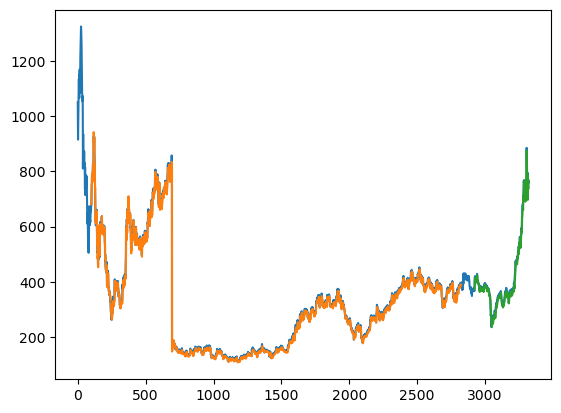

In [33]:
#shift train predictions for plotting
look_back=100 #time_step=100
trainpredictplot= np.empty_like(df1)
trainpredictplot[:,:]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back, :]=train_predict
#shift test predictions for plotting
testpredictplot= np.empty_like(df1)
testpredictplot[:,:]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1, :]=test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

# Future prediction

In [34]:
len(test_data)

499

In [35]:
x_input=test_data[399:].reshape(1,-1)
x_input.shape

(1, 100)

In [36]:
#coverting the 100 rows of array to 100 values of list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
print(temp_input) #100 values in a list

[0.27526677928391907, 0.28663837501545053, 0.30031725104033624, 0.30015244530509666, 0.2961971076593465, 0.2996580280993779, 0.300399653907956, 0.29829838078365123, 0.3042313872522764, 0.3048906101932347, 0.30353096287750814, 0.29871039512175024, 0.2938074244983725, 0.29669152486506534, 0.3018005026574925, 0.3069094804499196, 0.31519096864570884, 0.31263647974949527, 0.31078241522804995, 0.31341930699188336, 0.3275926002224877, 0.3299822833834617, 0.324708499855795, 0.32507931276008406, 0.3382225701454411, 0.34353755510691775, 0.33954101602735776, 0.3380165629763916, 0.35396151786082153, 0.35598038811750654, 0.35478554653701955, 0.3476164970540975, 0.3498413744798319, 0.37250216307527506, 0.3719665444357464, 0.3683820196942854, 0.3601005314984962, 0.3506654031560298, 0.3440319723126365, 0.3482757199950558, 0.3584524741461004, 0.3661983437023608, 0.37233735734003537, 0.3814840756458324, 0.38193729141774135, 0.3984590663755099, 0.39499814593547855, 0.3926908656421244, 0.39821185777265056

In [38]:
#demonstrating prediction for next 10 days
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat=model.predict(x_input, verbose=1)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1, n_steps, 1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.5379902]
101
1 day input [0.28663838 0.30031725 0.30015245 0.29619711 0.29965803 0.30039965
 0.29829838 0.30423139 0.30489061 0.30353096 0.2987104  0.29380742
 0.29669152 0.3018005  0.30690948 0.31519097 0.31263648 0.31078242
 0.31341931 0.3275926  0.32998228 0.3247085  0.32507931 0.33822257
 0.34353756 0.33954102 0.33801656 0.35396152 0.35598039 0.35478555
 0.3476165  0.34984137 0.37250216 0.37196654 0.36838202 0.36010053
 0.3506654  0.34403197 0.34827572 0.35845247 0.36619834 0.37233736
 0.38148408 0.38193729 0.39845907 0.39499815 0.39269087 0.39821186
 0.42124346 0.43628198 0.43924849 0.46108525 0.46108525 0.46656504
 0.46808949 0.47155041 0.46190927 0.49515883 0.488649   0.48963784
 0.50615961 0.53108648 0.53994479 0.53607186 0.54167525 0.53475341
 0.5345062  0.528738   0.5087141  0.51522393 0.49977339 0.49033826
 0.47880186 0.50743686 0.53112768 0.52741955 0.49598286 0.49462321
 0.50063862 0.50220428 0.52041531 0.5228874  0.61163528 0.63825141
 0.59952206 0.59869803 0.57636686 

1/1 [==============================] - 0s 41ms/step
7 day output [[0.5306544]]
8 day input [0.30423139 0.30489061 0.30353096 0.2987104  0.29380742 0.29669152
 0.3018005  0.30690948 0.31519097 0.31263648 0.31078242 0.31341931
 0.3275926  0.32998228 0.3247085  0.32507931 0.33822257 0.34353756
 0.33954102 0.33801656 0.35396152 0.35598039 0.35478555 0.3476165
 0.34984137 0.37250216 0.37196654 0.36838202 0.36010053 0.3506654
 0.34403197 0.34827572 0.35845247 0.36619834 0.37233736 0.38148408
 0.38193729 0.39845907 0.39499815 0.39269087 0.39821186 0.42124346
 0.43628198 0.43924849 0.46108525 0.46108525 0.46656504 0.46808949
 0.47155041 0.46190927 0.49515883 0.488649   0.48963784 0.50615961
 0.53108648 0.53994479 0.53607186 0.54167525 0.53475341 0.5345062
 0.528738   0.5087141  0.51522393 0.49977339 0.49033826 0.47880186
 0.50743686 0.53112768 0.52741955 0.49598286 0.49462321 0.50063862
 0.50220428 0.52041531 0.5228874  0.61163528 0.63825141 0.59952206
 0.59869803 0.57636686 0.5317457  0.53071

1/1 [==============================] - 0s 31ms/step
14 day output [[0.4357934]]
15 day input [0.30690948 0.31519097 0.31263648 0.31078242 0.31341931 0.3275926
 0.32998228 0.3247085  0.32507931 0.33822257 0.34353756 0.33954102
 0.33801656 0.35396152 0.35598039 0.35478555 0.3476165  0.34984137
 0.37250216 0.37196654 0.36838202 0.36010053 0.3506654  0.34403197
 0.34827572 0.35845247 0.36619834 0.37233736 0.38148408 0.38193729
 0.39845907 0.39499815 0.39269087 0.39821186 0.42124346 0.43628198
 0.43924849 0.46108525 0.46108525 0.46656504 0.46808949 0.47155041
 0.46190927 0.49515883 0.488649   0.48963784 0.50615961 0.53108648
 0.53994479 0.53607186 0.54167525 0.53475341 0.5345062  0.528738
 0.5087141  0.51522393 0.49977339 0.49033826 0.47880186 0.50743686
 0.53112768 0.52741955 0.49598286 0.49462321 0.50063862 0.50220428
 0.52041531 0.5228874  0.61163528 0.63825141 0.59952206 0.59869803
 0.57636686 0.5317457  0.53071567 0.56396523 0.51126859 0.52362902
 0.52280499 0.52445305 0.51847884 0.533

1/1 [==============================] - 0s 31ms/step
21 day output [[0.4071691]]
22 day input [0.3247085  0.32507931 0.33822257 0.34353756 0.33954102 0.33801656
 0.35396152 0.35598039 0.35478555 0.3476165  0.34984137 0.37250216
 0.37196654 0.36838202 0.36010053 0.3506654  0.34403197 0.34827572
 0.35845247 0.36619834 0.37233736 0.38148408 0.38193729 0.39845907
 0.39499815 0.39269087 0.39821186 0.42124346 0.43628198 0.43924849
 0.46108525 0.46108525 0.46656504 0.46808949 0.47155041 0.46190927
 0.49515883 0.488649   0.48963784 0.50615961 0.53108648 0.53994479
 0.53607186 0.54167525 0.53475341 0.5345062  0.528738   0.5087141
 0.51522393 0.49977339 0.49033826 0.47880186 0.50743686 0.53112768
 0.52741955 0.49598286 0.49462321 0.50063862 0.50220428 0.52041531
 0.5228874  0.61163528 0.63825141 0.59952206 0.59869803 0.57636686
 0.5317457  0.53071567 0.56396523 0.51126859 0.52362902 0.52280499
 0.52445305 0.51847884 0.53318775 0.53524783 0.54006839 0.53479461
 0.53799021 0.54302466 0.54976773 0.5

1/1 [==============================] - 0s 47ms/step
28 day output [[0.3712569]]
29 day input [0.35598039 0.35478555 0.3476165  0.34984137 0.37250216 0.37196654
 0.36838202 0.36010053 0.3506654  0.34403197 0.34827572 0.35845247
 0.36619834 0.37233736 0.38148408 0.38193729 0.39845907 0.39499815
 0.39269087 0.39821186 0.42124346 0.43628198 0.43924849 0.46108525
 0.46108525 0.46656504 0.46808949 0.47155041 0.46190927 0.49515883
 0.488649   0.48963784 0.50615961 0.53108648 0.53994479 0.53607186
 0.54167525 0.53475341 0.5345062  0.528738   0.5087141  0.51522393
 0.49977339 0.49033826 0.47880186 0.50743686 0.53112768 0.52741955
 0.49598286 0.49462321 0.50063862 0.50220428 0.52041531 0.5228874
 0.61163528 0.63825141 0.59952206 0.59869803 0.57636686 0.5317457
 0.53071567 0.56396523 0.51126859 0.52362902 0.52280499 0.52445305
 0.51847884 0.53318775 0.53524783 0.54006839 0.53479461 0.53799021
 0.54302466 0.54976773 0.55487412 0.55607003 0.55219436 0.54335761
 0.53065437 0.5156306  0.49977055 0.48

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [40]:
len(df1)

3322

In [41]:
df3=df1.tolist()
df3.extend(lst_output)

plt.plot(day_new,scaler.inverse_transform(df1[3222:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

# MODEL 2 :LSTM

In [3]:
data=pd.read_csv("ADANIPORTS.csv")
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [22]:
data.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [64]:
dataa=data.drop("Trades",axis=1)

In [65]:
data1=dataa.reset_index()["High"]
data1.shape

(3322,)

In [110]:
train_size=int(len(data1)*0.75)
test_size=len(data1)-train_size
train_size, test_size

(2491, 831)

In [111]:
train_data=data1[0:train_size]
test_data=data1[train_size::]
print(len(train_data)),print(len(test_data))

2491
831


(None, None)

In [112]:
train_data.to_csv("train_data.csv")
test_data.to_csv("test_data.csv")

In [113]:
train_data=pd.read_csv("adani_train_data.csv")
train_data.head()

,Unnamed: 0,High
0,0,1050.00
1,1,990.00
2,2,914.75
3,3,958.00
4,4,995.00


In [114]:
train_dataa=train_data.drop("Unnamed: 0",axis=1)

In [81]:
training_set=train_dataa.iloc[:,:].values
training_set

array([[1050.  ],
       [ 990.  ],
       [ 914.75],
       ...,
       [ 398.9 ],
       [ 408.  ],
       [ 414.5 ]])

In [121]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df2=sc.fit_transform(training_set)

In [86]:
df2.shape

(2491, 1)

In [88]:
#Creating a datastructure with 60 timesteps adn 1 output
x_train=[]
y_train=[]
for i in range(60, 1258):
    x_train.append(df1[i-60:i, 0])
    y_train.append(df1[i, 0])

x_train,y_train=np.array(x_train), np.array(y_train)

In [89]:
#Reshaping
x_train =np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [90]:
print(x_train)

[[[0.77421614]
  [0.72477442]
  [0.66276626]
  ...
  [0.54760826]
  [0.5574142 ]
  [0.53524783]]

 [[0.72477442]
  [0.66276626]
  [0.6984055 ]
  ...
  [0.5574142 ]
  [0.53524783]
  [0.53689588]]

 [[0.66276626]
  [0.6984055 ]
  [0.72889457]
  ...
  [0.53524783]
  [0.53689588]
  [0.51629517]]

 ...

 [[0.00737506]
  [0.01071237]
  [0.00935273]
  ...
  [0.02776977]
  [0.02950023]
  [0.02962383]]

 [[0.01071237]
  [0.00935273]
  [0.01112439]
  ...
  [0.02950023]
  [0.02962383]
  [0.02962383]]

 [[0.00935273]
  [0.01112439]
  [0.0114952 ]
  ...
  [0.02962383]
  [0.02962383]
  [0.02608051]]]


Building RNN

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [93]:
regressor= Sequential()

In [94]:
#adding first lstm layer and dropout regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
#adding second lstm layer and dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
#adding third lstm layer and dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
#adding fourth lstm layer and dropout regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
#adding output layer
regressor.add(Dense(units=1))

In [95]:
#Compiling 
regressor.compile(optimizer="adam", loss="mean_squared_error")

In [96]:
#fitting
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 20s 204ms/step - loss: 0.0108
Epoch 2/100
38/38 [==============================] - 8s 211ms/step - loss: 0.0047
Epoch 3/100
38/38 [==============================] - 8s 199ms/step - loss: 0.0043
Epoch 4/100
38/38 [==============================] - 8s 213ms/step - loss: 0.0042
Epoch 5/100
38/38 [==============================] - 7s 194ms/step - loss: 0.0038
Epoch 6/100
38/38 [==============================] - 7s 196ms/step - loss: 0.0032
Epoch 7/100
38/38 [==============================] - 8s 210ms/step - loss: 0.0035
Epoch 8/100
38/38 [==============================] - 9s 227ms/step - loss: 0.0031
Epoch 9/100
38/38 [==============================] - 8s 211ms/step - loss: 0.0031
Epoch 10/100
38/38 [==============================] - 10s 263ms/step - loss: 0.0038
Epoch 11/100
38/38 [==============================] - 9s 225ms/step - loss: 0.0029
Epoch 12/100
38/38 [==============================] - 7s 189ms/step - loss: 0.0036
Epoch 13/10

38/38 [==============================] - 7s 192ms/step - loss: 8.2388e-04
Epoch 99/100
38/38 [==============================] - 8s 202ms/step - loss: 0.0011
Epoch 100/100
38/38 [==============================] - 7s 176ms/step - loss: 8.7636e-04


In [97]:
pred=regressor.predict(x_train)

In [98]:
#Evaluation
import math
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(y_train,pred))
rmse

0.02154104805447856

In [118]:
#PlottingMaking predictions and visualising the results
test_data=pd.read_csv("adani_test_data.csv")
real_stock_price=test_data.iloc[: ,1:2].values

In [119]:
real_stock_price.shape

(831, 1)

In [124]:
dataset_total=pd.concat((train_data["High"], test_data["High"]), axis=0)
inputs= dataset_total[len(dataset_total)-len(test_data)-60:].values
inputs= inputs.reshape(-1,1)
inputs= sc.transform(inputs)
x_test=[]
for i in range(60, 800):
    x_test.append(inputs[i-60:i, 0])
x_test= np.array(x_test)
x_test= np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price= regressor.predict(x_test)
predicted_stock_price= sc.inverse_transform(predicted_stock_price)

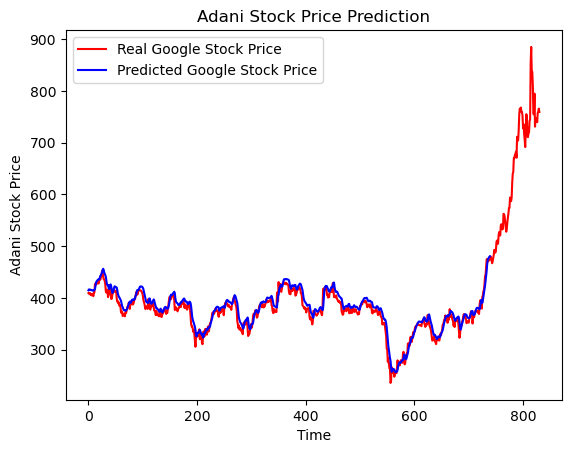

In [125]:
#Visualization
plt.plot(real_stock_price, color="red", label="Real Google Stock Price")
plt.plot(predicted_stock_price, color="blue", label="Predicted Google Stock Price")
plt.title("Adani Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Adani Stock Price")
plt.legend()
plt.show()


# MODEL 3: ARIMA

In [134]:
data3=pd.read_csv('ADANIPORTS.csv')
data3

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [138]:
# Convert Date into Datetime
data3['Date']=pd.to_datetime(data3['Date'])
data3["Date"]

0      2007-11-27
1      2007-11-28
2      2007-11-29
3      2007-11-30
4      2007-12-03
          ...    
3317   2021-04-26
3318   2021-04-27
3319   2021-04-28
3320   2021-04-29
3321   2021-04-30
Name: Date, Length: 3322, dtype: datetime64[ns]

In [140]:
data3.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [147]:
data33=data3.drop(columns=[ 'Symbol', 'Series', 'Prev Close', 'Open', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],axis=1)

In [148]:
data33.head()

,Date,High
0,2007-11-27,1050.00
1,2007-11-28,990.00
2,2007-11-29,914.75
3,2007-11-30,958.00
4,2007-12-03,995.00


In [149]:
data33=data33.set_index("Date")
data33.head()

,High
Date,
2007-11-27,1050.00
2007-11-28,990.00
2007-11-29,914.75
2007-11-30,958.00
2007-12-03,995.00


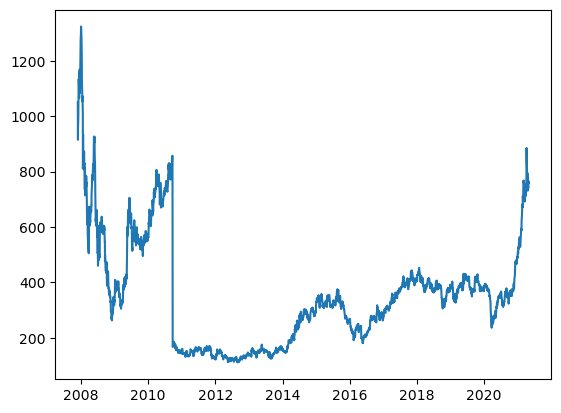

In [150]:
#visualize
plt.plot(data33)
plt.show()

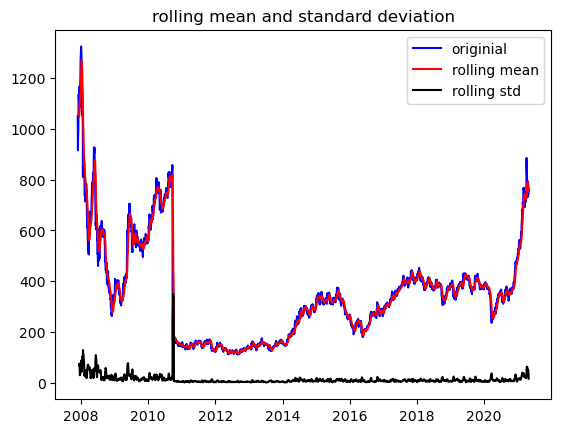

In [151]:
#Check for Staionarity
#Method 1: rolling
#Determining rolling statistics
rolmean= data33.rolling(window=12).mean()
rolstd= data33.rolling(window=12).std()

#Plot rolling statistics
orig= plt.plot(data33, color="blue", label="originial")
mean= plt.plot(rolmean, color="red", label="rolling mean")
std= plt.plot(rolstd, color="black", label="rolling std")
plt.title("rolling mean and standard deviation")
plt.legend()
plt.show()

In [152]:
#Method 1: ADF
# ADF Test - null hypothesis - non stationary - if p value< 5% reject null hpothesis

from statsmodels.tsa.stattools import adfuller
adfuller_result= adfuller(data33["High"].values)
adfuller_result

(-3.136090355755012,
 0.02399508825177784,
 1,
 3320,
 {'1%': -3.4323211937441576,
  '5%': -2.8624109575101833,
  '10%': -2.5672336283386556},
 27739.08583946894)

In [153]:
print("p-value: {}".format(adfuller_result[1]))

p-value: 0.02399508825177784


As 0.02<0.05, the time series is stationary

Plot ACF/PACF and find p,d,q parameters

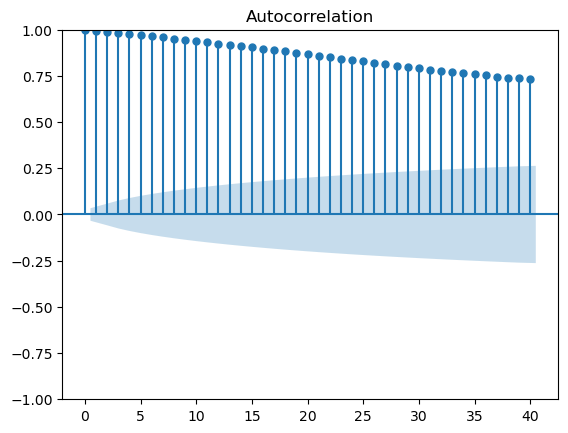

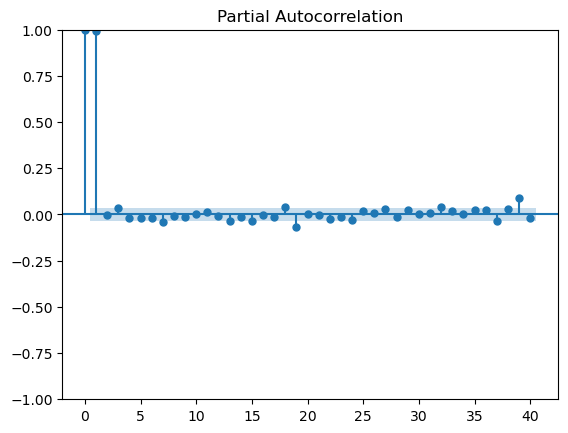

In [163]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
fig= sm.graphics.tsa.plot_acf(data33, lags=40)
fig= sm.graphics.tsa.plot_pacf(data33, lags=40)

From ACF curve, optimal values of q in the ARIMA model must be 1.

From PACF curve, optimal values of p in the ARIMA model 1.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


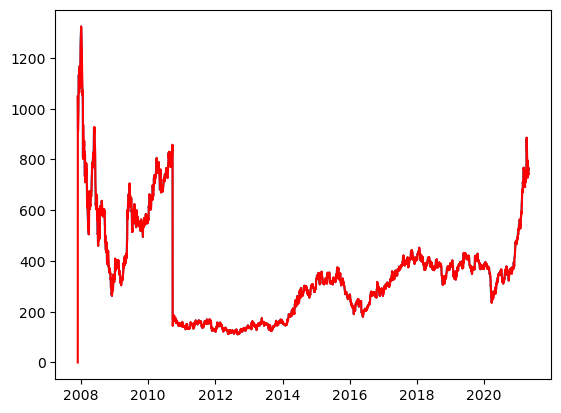

In [170]:
#Build ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(data33, order=(1,1,1))
results_ARIMA= model.fit()
plt.plot(data33)
plt.plot(results_ARIMA.fittedvalues, color="red")
plt.show()

# MODEL 4: ARIMA

In [179]:
data4=pd.read_csv('ADANIPORTS.csv')
data3

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [180]:
# Convert Date into Datetime
data4['Date']=pd.to_datetime(data4['Date'])
data4["Date"]

0      2007-11-27
1      2007-11-28
2      2007-11-29
3      2007-11-30
4      2007-12-03
          ...    
3317   2021-04-26
3318   2021-04-27
3319   2021-04-28
3320   2021-04-29
3321   2021-04-30
Name: Date, Length: 3322, dtype: datetime64[ns]

In [181]:
data44=data3.drop(columns=[ 'Symbol', 'Series', 'Prev Close', 'Open', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],axis=1)

In [182]:
data44.head()

,Date,High
0,2007-11-27,1050.00
1,2007-11-28,990.00
2,2007-11-29,914.75
3,2007-11-30,958.00
4,2007-12-03,995.00


In [183]:
data44=data44.set_index("Date")
data44.head()

,High
Date,
2007-11-27,1050.00
2007-11-28,990.00
2007-11-29,914.75
2007-11-30,958.00
2007-12-03,995.00


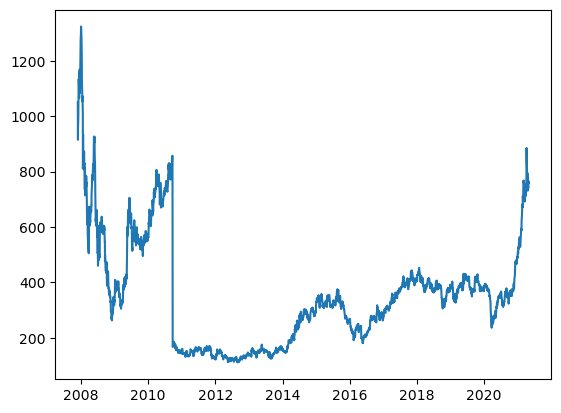

In [184]:
#visualize
plt.plot(data44)
plt.show()

In [185]:
#Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [187]:
test_result=adfuller(df['High'])

In [193]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(High):
    result=adfuller(High)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis.Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [194]:
adfuller_test(df['High'])

ADF Test Statistic : -3.136090355755012
p-value : 0.02399508825177784
#Lags Used : 1
Number of Observations Used : 3320
strong evidence against the null hypothesis(Ho), reject the null hypothesis.Data has no unit root and is stationary


Hence we can see that our data is stationary as p-value<0.05

In [195]:
# Non-Seasonal data
data44['LastFirstDifference'] = data44['High'] - data44['High'].shift(1)

In [196]:
data44['High'].shift(1)

Date
2007-11-27        NaN
2007-11-28    1050.00
2007-11-29     990.00
2007-11-30     914.75
2007-12-03     958.00
               ...   
2021-04-26     746.90
2021-04-27     739.65
2021-04-28     757.50
2021-04-29     760.00
2021-04-30     765.85
Name: High, Length: 3322, dtype: float64

In [197]:
#Again test dickey fuller test
adfuller_test(data44['LastFirstDifference'].dropna())

ADF Test Statistic : -55.5282703168787
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 3320
strong evidence against the null hypothesis(Ho), reject the null hypothesis.Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

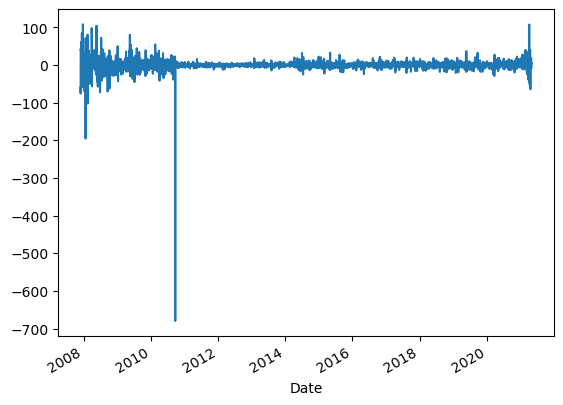

In [198]:
data44['LastFirstDifference'].plot()

In [199]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(data44['High'])
plt.show()

ModuleNotFoundError: No module named 'pandas.tools'

In [200]:
import statsmodels.api as sm

In [201]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [202]:
# For non-seasonal data
#p=1, d=1, q=0 or 1 #order=(p,d,q)
from statsmodels.tsa.arima.model import ARIMA

In [208]:
#Non-Seasonal Model
model=ARIMA(data44['High'],order=(1,1,0))
model_fit=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [209]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   High   No. Observations:                 3322
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -14076.544
Date:                Sat, 04 Feb 2023   AIC                          28157.089
Time:                        00:19:06   BIC                          28169.305
Sample:                             0   HQIC                         28161.460
                               - 3322                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0387      0.009      4.415      0.000       0.022       0.056
sigma2       281.2976      0.345    815.912      0.000     280.622     281.973
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          92635056.13
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                           -20.22
Prob(H) (two-sided):                  0.00   Kurtosis:                       820.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [222]:
data44.shape

(3322, 3)

<AxesSubplot:xlabel='Date'>

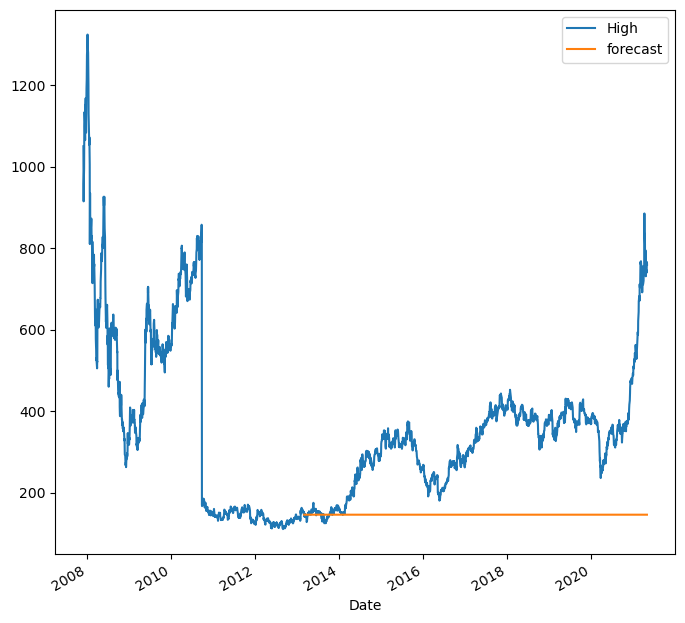

In [225]:
data44['forecast']=model_fit.predict(start=1305,end=3320,dynamic=True)
data44[['High','forecast']].plot(figsize=(8,8))

In [211]:
#Seasonal Model 
model=sm.tsa.statespace.SARIMAX(data44['High'],order=(1, 1, 0),seasonal_order=(1,1,0,12))
results=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Date'>

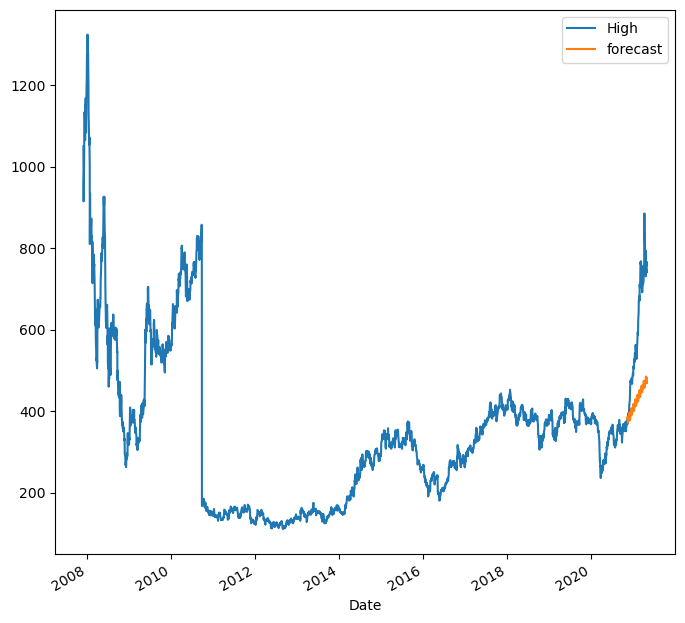

In [227]:
data44['forecast']=results.predict(start=3205,end=3320,dynamic=True)
data44[['High','forecast']].plot(figsize=(8,8))

In [228]:
from pandas.tseries.offsets import DateOffset
future_dates=[data44.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [229]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data44.columns)

In [230]:
future_datest_df.tail()

,High,LastFirstDifference,forecast
2022-11-30,NaN,NaN,NaN
2022-12-30,NaN,NaN,NaN
2023-01-30,NaN,NaN,NaN
2023-02-28,NaN,NaN,NaN
2023-03-30,NaN,NaN,NaN


In [231]:
future_df=pd.concat([data44,future_datest_df])

<AxesSubplot:>

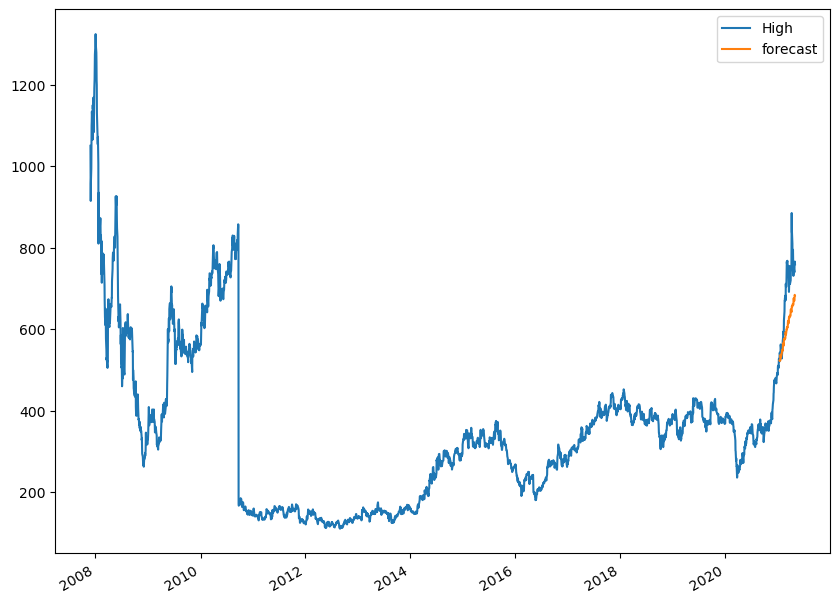

In [234]:
future_df['forecast'] = results.predict(start =3250, end= 3320, dynamic= True)  
future_df[['High','forecast']].plot(figsize=(10, 8)) 